<h1><center>Data Engineering: Assignment 4</center></h1>


## Table of Content:

1) ["Data Quality Check"](#1)

2) ["Data Encoding Practices"](#2)

3) ["Making Target Class"](#3)

4) ["Modeling"](#4)

5) ["Cross Validation Practices"](#5)

6) ["Machine Learning Pipeline"](#6)

<a id ="top"></a>


## *We will use data provided by UCI for easier importing and practice.*

### For this notebook I am using car model data:
I was able to find a good dataset at the UCI Machine Learning Repository. This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. 

### Target Class:
Since the data doesnt have pre built target classes. I will use prices later to build classes for affordable vs unaffordable cars. Will try to pridict if a car is affordable or not with its specification.

In [22]:
import pandas as pd
import numpy as np

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

In [25]:
# preview of the dataframe
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 1) Data Quality check:
["Back to Table of Content"](#top)
<a id ="1"></a>

In [24]:
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

> ###  Great we need to clean the Dataset before we proceed any further

### We now know several ways to deal with missing values: 
- Removing the rows would be an easier way to deal with the problem since imputation here would make no sense.

### We see that normalized_losses has the most missing value: 
- Deleting 41 rows filled with information for a column would be a big loss of data
-  we will drop this column to keep more data for training 

In [36]:
len(df)

205

In [37]:
len(df["normalized_losses"].unique())

52

In [27]:
df[df.isnull().any(axis=1)].head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


In [38]:
# Dropping normalized_losses
df.drop(["normalized_losses"], axis =1, inplace=True)

### Imputation for some missing values:

In [44]:
df["num_doors"].value_counts()

four    116
two      89
Name: num_doors, dtype: int64

In [57]:
print("num_doors: \n \n",df["num_doors"].value_counts())

num_doors: 
 
 four    116
two      89
Name: num_doors, dtype: int64


In [58]:
# replacing NA values in num_doors
df = df.fillna({"num_doors": "four"})

In [61]:
# Other NA values have continous values so dropping them would make the most sense
df.dropna(inplace=True)

In [62]:
# Checking the other missing data
df.isna().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# 2) Data encoding:
### Since there are columns with values as category we would encode them to integers for better and faster performance of the model.
["Back to Table of Content"](#top)
<a id ="2"></a>

In [64]:
df.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [84]:
# Since we have to work with columns that are object type we will seperate them in a different dataframe to work with
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Approach #1 - Find and Replace:
## We see that some of the values are spelled numbers: like four: 4 and two:2
- we will find and replace these values first

In [85]:
# Making dict to replace them
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [86]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [87]:
# The nice benefit to this approach is that pandas “knows” the types of values in the columns so the object is now a int64
obj_df.dtypes

make               object
fuel_type          object
aspiration         object
num_doors           int64
body_style         object
drive_wheels       object
engine_location    object
engine_type        object
num_cylinders       int64
fuel_system        object
dtype: object

## Approach 2 - Label Encoding: 
*Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:*

- convertible -> 0
- hardtop -> 1
- hatchback -> 2
- sedan -> 3
- wagon -> 4

In [88]:
# can use in pandas is to convert a column to a category, then use those category values for your label encoding
obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors             int64
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

In [89]:
# encoded variable to a new column using the cat.codes accessor
obj_df["body_style"] = obj_df["body_style"].cat.codes
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,0,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,0,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,2,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,3,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,3,4wd,front,ohc,5,mpfi


In [95]:
# Lets do same for other columns 
obj_df["aspiration"] = obj_df["aspiration"].astype('category')
obj_df["fuel_type"] = obj_df["fuel_type"].astype('category')
obj_df["drive_wheels"] = obj_df["drive_wheels"].astype('category')
obj_df["engine_location"] = obj_df["engine_location"].astype('category')
obj_df["engine_type"] = obj_df["engine_type"].astype('category')
obj_df["fuel_system"] = obj_df["fuel_system"].astype('category')
obj_df["make"] = obj_df["make"].astype('category')
# Cat.codes for them 
obj_df["aspiration"] = obj_df["aspiration"].cat.codes
obj_df["fuel_type"] = obj_df["fuel_type"].cat.codes
obj_df["drive_wheels"] = obj_df["drive_wheels"].cat.codes
obj_df["engine_location"] = obj_df["engine_location"].cat.codes
obj_df["engine_type"] = obj_df["engine_type"].cat.codes
obj_df["fuel_system"] = obj_df["fuel_system"].cat.codes
obj_df["make"] = obj_df["make"].cat.codes

In [96]:
obj_df.dtypes

make                int8
fuel_type           int8
aspiration          int8
num_doors          int64
body_style          int8
drive_wheels        int8
engine_location     int8
engine_type         int8
num_cylinders      int64
fuel_system         int8
dtype: object

## Approach 3 - One Hot Encoding:
### *Basically we will make dummy columns for drive_wheels and body_style column*
###   Method to do so "LabelBinarizer" in sklearn.preprocessing

In [97]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["fuel_system"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,0,1,2,3,4,5,6
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


*The problem with above method is that it takes only one column at a time and we have better method below which takes multiple columns at a time*
- the above method increases the dimensions and makes it all look messy hence we avoided it 

## Lets combine the the other columns with the obj_df


In [102]:
df.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [121]:
df_non_obj = df.select_dtypes(include = ['int64','float64']).copy()

In [122]:
final_df = pd.concat([obj_df, df_non_obj], axis=1)

In [123]:
# Preview of final dataframe
final_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,...,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,0,2,0,2,0,0,4,4,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,1,0,2,0,2,0,0,4,4,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,1,0,2,2,2,0,4,6,4,...,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,1,1,0,4,3,1,0,2,4,4,...,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,1,1,0,4,3,0,0,2,5,4,...,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 3) Making Target Class:
### We will use price as a target variable and split it into 2 classes.
- Values above mean price will be "expensive_car"
- Values below mean price will be "affordable_car"

["Back to Table of Content"](#top)
<a id ="3"></a>

In [124]:
mean_price= final_df["price"].mean()

In [125]:
final_df

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,...,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,0,2,0,2,0,0,4,4,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,1,0,2,0,2,0,0,4,4,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,1,0,2,2,2,0,4,6,4,...,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,1,1,0,4,3,1,0,2,4,4,...,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,1,1,0,4,3,0,0,2,5,4,...,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,20,1,0,4,3,2,0,2,4,4,...,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,20,1,1,4,3,2,0,2,4,4,...,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,20,1,0,4,3,2,0,4,6,4,...,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,20,0,1,4,3,2,0,2,6,2,...,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [126]:
final_df.loc[final_df["price"] >=  mean_price,"price"] = "expensive_car"
final_df.loc[final_df["price"] !=  "expensive_car","price"] = "affordable_car"

In [130]:
final_df["price"].value_counts()

affordable_car    123
expensive_car      72
Name: price, dtype: int64

# 3) Pre-processing: Splitting the dataset

In [131]:

# Import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [135]:
y = final_df["price"]
X = final_df.drop(["price"], axis = 1)

In [137]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)


# 4) Modeling: 
## We will take affordable_car class as our positive class
["Back to Table of Content"](#top)
<a id ="4"></a>

## Using SVM method:

In [167]:
### Support Vector Machine Classification ###
# import modules
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [168]:
#instantiate classifier object and fit to training data
clf = SVC(kernel="linear", C=0.5)
clf.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [169]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label ="affordable_car") 
print('f1 score (SVM) is = ' + str(f1))

f1 score (SVM) is = 0.9142857142857143


## Decision Tree Classification:

In [170]:
# import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [171]:
#instantiate classifier object and fit to training data
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred,pos_label ="affordable_car") 
print('f1 score (Decision Tree) is = ' + str(f1))

f1 score (Decision Tree) is = 0.9315068493150684


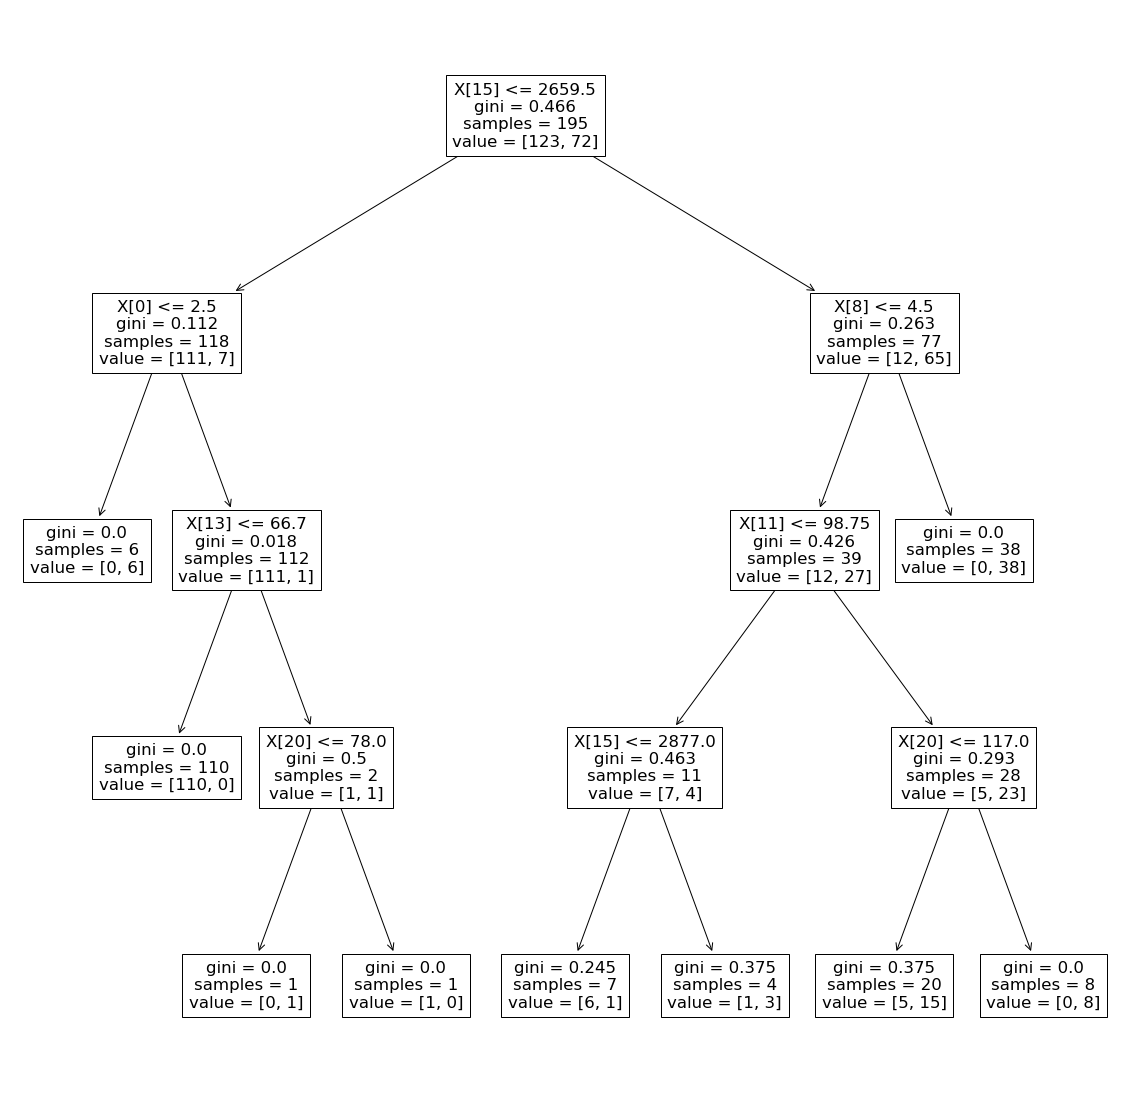

In [173]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
_ = tree.plot_tree(clf.fit(X, y)) 

 ## Decision Tree is definetly performing better than SVM method so far

## Random Forest Classification:

In [174]:

# import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


In [175]:

#instantiate classifier object and fit to training data
clf = RandomForestClassifier(max_depth=4, n_estimators=4, 
                             max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred,pos_label ="affordable_car") 
print('f1 score is = ' + str(f1))


f1 score is = 0.8857142857142857


### Random forest again dropped the performance

# 5) Cross Validation Techniques: 
*Lets try some validation techniques to better the results*
["Back to Table of Content"](#top)
<a id ="5"></a>

## k-fold Cross Validation:
- We are doing 5 folds for this 

In [178]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [179]:

# instantiate classifier object and pass to cross_val_score function
clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)

[0.92513369 0.80519481 0.92058824 0.91666667 0.92058824]


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

## Grid Search with k-fold Cross-validation:

In [180]:
# instantiate svc and gridsearch object and fit 
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train)

# print best scoring classifier
print('Best score is = ' + str(clf.best_score_))
print('Best parameters are = ' + str(clf.best_params_))

Best score is = 0.9052972759730062
Best parameters are = {'C': 1, 'kernel': 'linear'}


## 6) Building a Pipeline to automate the complete process:
*We will build a pipeline that transforms the data with PCA and then predicts labels with LogisticRegression. Let's start by loading the iris dataset and required modules, and splitting the data into a train/test set. We will use k-fold cross-validation in the grid search, so no need to make a separate validation set.*

["Back to Table of Content"](#top)
<a id ="6"></a>

In [183]:
# load iris and create X and y
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# import modules 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [184]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
        

### Now, we can instantiate the transformer and classifier objects, and feed them into the pipeline.

In [185]:

# instantiate the transformer and classifier objects
pca = PCA()
logistic = LogisticRegression(solver='liblinear', multi_class='ovr', C=1.5)



In [186]:
# instantiate a pipeline and add steps to the pipeline
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])



### Next, we will create the parameter grid that the grid search will use and instantiate the grid search object. Here, we will test a few values of n_components for PCA and C for logistic regression using 5-fold cross-validation. 

In [187]:

# Finally, we fit our model to the data and print out the best parameters. 

# set the parameter grid to be passed to the grid search
param_grid = {
    'pca__n_components': [2, 3, 4],
    'logistic__C': [0.5, 1, 5, 10],
}



In [188]:
# instantiate the grid search object and pass the pipe and param_grid
model = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)

In [189]:
# fit entire pipeline using grid search and 5-fold cross validation
model.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)


Best parameter (CV score=0.960):
{'logistic__C': 10, 'pca__n_components': 2}


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [190]:
# use the resulting pipeline to predict on new data
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

[[6.4 3.2 5.3 2.3]
 [6.7 3.1 4.7 1.5]
 [6.2 3.4 5.4 2.3]
 [4.8 3.4 1.9 0.2]
 [6.1 2.8 4.7 1.2]
 [6.8 3.  5.5 2.1]
 [5.7 2.6 3.5 1. ]
 [7.7 2.8 6.7 2. ]
 [4.4 2.9 1.4 0.2]
 [6.  2.7 5.1 1.6]
 [5.7 3.8 1.7 0.3]
 [5.2 2.7 3.9 1.4]
 [5.6 3.  4.1 1.3]
 [4.9 2.4 3.3 1. ]
 [7.  3.2 4.7 1.4]
 [5.7 4.4 1.5 0.4]
 [5.7 2.8 4.5 1.3]
 [5.7 2.8 4.1 1.3]
 [4.4 3.2 1.3 0.2]
 [6.  3.  4.8 1.8]
 [6.1 3.  4.9 1.8]
 [4.8 3.4 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [5.4 3.9 1.7 0.4]
 [5.6 2.7 4.2 1.3]
 [5.5 2.3 4.  1.3]
 [4.8 3.1 1.6 0.2]
 [5.8 2.6 4.  1.2]
 [5.  3.2 1.2 0.2]
 [5.8 2.7 4.1 1. ]
 [6.5 3.2 5.1 2. ]
 [5.1 3.4 1.5 0.2]
 [4.6 3.2 1.4 0.2]
 [6.4 3.1 5.5 1.8]
 [5.7 3.  4.2 1.2]
 [7.4 2.8 6.1 1.9]
 [5.5 3.5 1.3 0.2]
 [6.5 3.  5.5 1.8]
 [5.5 2.4 3.8 1.1]
 [4.8 3.  1.4 0.1]
 [6.8 3.2 5.9 2.3]
 [5.7 2.5 5.  2. ]
 [7.2 3.  5.8 1.6]
 [6.2 2.2 4.5 1.5]
 [6.9 3.1 5.1 2.3]
 [7.7 2.6 6.9 2.3]
 [6.3 2.5 4.9 1.5]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [7.6 3.  6.6 2.1]]
[2 1 2 0 1 2 1 2 0 2 0 1 1 1 1 0 1 1 0 2 2 0 1 0 